## 读取图片

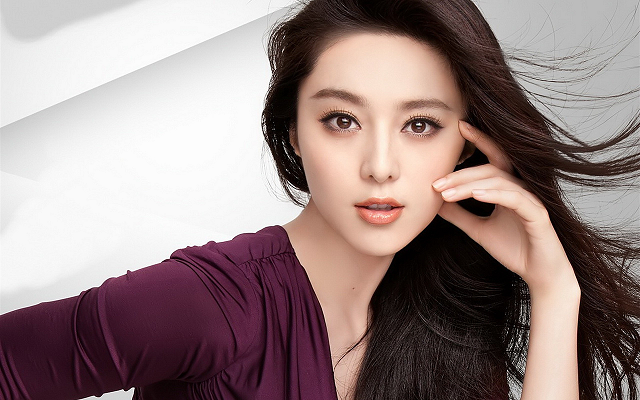

In [468]:
import numpy as np
from PIL import Image
img = Image.open('Data/iceice.png')
img

## 转为数学矩阵

In [472]:
import numpy
imgary = numpy.array(img)
#imgary
imgary = imgary / 255
#imgary

In [473]:
original_bytes = imgary.nbytes
original_bytes

8192000

In [474]:
imgary.shape

(400, 640, 4)

## 拆分为红蓝绿三色矩阵

In [475]:
img_red   = imgary[:, :, 0]
img_green = imgary[:, :, 1]
img_blue  = imgary[:, :, 2]

In [476]:
img_red.shape
img_green.shape
img_blue.shape

(400, 640)

## 使用SVD 分解矩阵

In [477]:
from numpy.linalg import svd

U_r, S_r, V_r = svd(img_red, full_matrices=True)
U_g, S_g, V_g = svd(img_green, full_matrices=True)
U_b, S_b, V_b = svd(img_blue, full_matrices=True)

In [480]:
U_r.shape
S_r.shape
V_r.shape

(640, 640)

## 取用50个特征值

In [494]:
k = 100

In [495]:
U_r_k = U_r[:, 0:k]
V_r_k = V_r[0:k, :]
U_g_k = U_g[:, 0:k]
V_g_k = V_g[0:k, :]
U_b_k = U_b[:, 0:k]
V_b_k = V_b[0:k, :]

S_r_k = S_r[0:k]
S_g_k = S_g[0:k]
S_b_k = S_b[0:k]

In [496]:
U_r_k.shape
S_r_k.shape
V_r_k.shape
#(400 X 50) dot (50 X 50) doc(50 X 640) => (400 X 640)

(100, 640)

## 计算压缩比

In [497]:
compressed_bytes = sum([matrix.nbytes for matrix in 
                        [U_r_k, S_r_k, V_r_k, U_g_k, S_g_k, V_g_k, U_b_k, S_b_k, V_b_k]])
ratio = compressed_bytes / original_bytes
ratio

0.30498046875000001

## 还原矩阵

In [498]:
image_red_approx   = np.dot(U_r_k, np.dot(numpy.diag(S_r_k), V_r_k))
image_green_approx = np.dot(U_g_k, np.dot(numpy.diag(S_g_k), V_g_k))
image_blue_approx  = np.dot(U_b_k, np.dot(numpy.diag(S_b_k), V_b_k))

In [499]:
image_red_approx.shape

(400, 640)

In [500]:
row, col, _ = imgarr.shape
img_reconstructed = np.zeros((row, col, 3))

img_reconstructed[:, :, 0] = image_red_approx
img_reconstructed[:, :, 1] = image_green_approx
img_reconstructed[:, :, 2] = image_blue_approx

In [501]:
img_reconstructed.shape

(400, 640, 3)

## 正规化异常值

In [502]:
img_reconstructed[img_reconstructed < 0] = 0
img_reconstructed[img_reconstructed > 1] = 1

In [503]:
img_reconstructed.shape

(400, 640, 3)

## 绘制还原图片

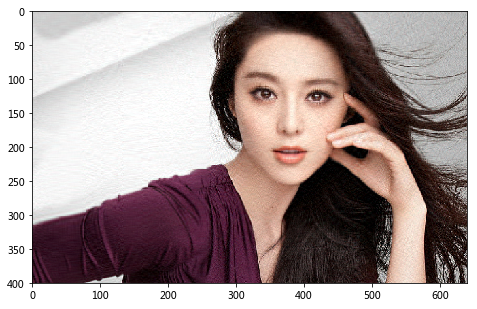

In [504]:
fig = plt.figure(figsize=(10,5))
a = fig.add_subplot(1, 1, 1)
imgplot = plt.imshow(img_reconstructed)